# Análisis exploratorio de datos

## 1. Introducción 

El conjunto de datos que se pretende analizar en este notebook se denomina **EXIST** y representa un problema de **detección y clasificación de sexismo** a partir de conjuntos de **textos en español e inglés** procedentes de las redes sociales **Twitter y Gab**. Esta temática surge en un formato competitivo teniendo lugar su primera edición en el año 2021 con una segunda recientemente terminada en el presente año 2022.

En este notebook se detallan los aspectos más relevantes acerca de la **composición de los conjuntos de entrenamiento y test, así como análisis estadísticos y visuales** que ayuden a comprender tanto la temática como los datos disponibles para abordarla. Para ello se ha hecho uso de los artículos [*Overview of EXIST 2021*](http://diposit.ub.edu/dspace/bitstream/2445/181257/1/715155.pdf) y [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), en los que se describe la motivación y los objetivos del problema del sexismo, los procesos de recolección de datos, normativa de la competición, evaluación de resultados y las propuestas de los participantes.

## 2. Estructura del notebook

1. Introducción al notebook
2. Estructura del notebook
3. Recopilación de datos
4. Muestreo de datos
5. Etiquetado de datos
6. Instalación y carga de librerías
7. Lectura y carga de datos
8. Análisis de características
9. Análisis de textos
10. Conclusiones finales

## 3. Recopilación de datos

El proceso de recolección de datos fue orientado primeramente a establecer un **conjunto de expresiones populares y términos sexistas**, en español e inglés, que manifiestan una infravolaración hacia el rol de la mujer en la sociedad. Para ello se inspiraron en trabajos previamente realizados en el mismo área, cuentas y hashtags populares de redes sociales, etc. A continuación se resumen los métodos de recolección de datos diferenciados por la red social tomada como fuente de datos.

### 3.1. Twitter

La recogida de datos procedentes de esta plataforma social se elaboró en **dos períodos**, una primera fase de Diciembre de 2020 hasta Febrero de 2021 para componer la **primera versión** de un dataset de entrenamiento y otro de test. Mientras que en la **segunda edición** de la competición el objetivo consistía en **ampliar el conjunto de datos de test** y por ende se realizó una segunda fase de recopilación de tweets durante el mes de Enero de 2022. En sendos intervalos se aplicaron **técnicas de balanceado**, como la eliminación de documentos, para equilibrar el número de textos en inglés y español.

### 3.2. Gab

Únicamente se celebró **una etapa** de recolección de datos desde **2016 hasta 2019** resultando en millones de textos en inglés, mientras que apenas se obtuvieron dos mil documentos en español. En este caso no se aplicaron técnicas de balanceado entre idiomas por lo que el conjunto de datos procedente de esta red social está prácticamente **sesgado hacia el inglés** en su totalidad.

## 4. Muestreo de datos

En esta segunda fase se pretende valorar la calidad de las muestras recopiladas en función de las expresiones y términos sexistas establecidos que componen las bases de la población de textos con la que se pretende aboradar el problema. De nuevo se llevaron a cabo dos procedimientos diferentes dependiendo de la fuente de datos.

### 4.1. Twitter

Tras diversos análisis estadísticos pudieron confirmar que el conjunto de tweets recopilados se caracterizaban por una **distribución uniforme**, por lo que para **cada expresión y término** considerados, se asignó un **volumen de tweets representativos** con los que componer un dataset de entrenamiento y otro de test.

### 4.2. Gab

En esta segunda fuente de datos los resultados estadísticos **no** pudieron determinar la presencia de una **distribución uniforme**, por lo que el proceso de selección de instancias aplicado fue diferente. 

1. En primer lugar se **eliminaron aquellos textos con información personal** de los autores, de modo que se redujese el sesgo introducido por los usuarios. 

2. A continuación se fijaron **intervalos temporales diferenciables** para seleccionar las muestras del conjunto de entrenamiento y de test, decrementando así el sesgo temporal existente. 

3. Posteriormente se impuso una **primera restricción** en la que **cada usuario** debía estar ligado, al menos a **un texto**, aunque en el caso de documentos españoles esta cifra se elevó a dos publicaciones por usuario. 

4. Finalmente la **segunda restricción** se basó en la única aparición de **cada usuario en un conjunto de datos**: entrenamiento o test, para evitar que una misma cuenta perteneciese a ambos.

## 5. Etiquetado de datos

En ambas ediciones de la competición datadas en 2021 y 2022 se conformaron varios **equipos de expertos en sexismo** con diversos grados de experiencia para etiquetar manualmente los textos recopilados. En los **primeros experimentos** los expertos disponían de una **menor experiencia**, mientras que en las **últimas iteraciones los más experimentados** terminaban de corregir las etiquetas del conjunto final *EXIST*.

Una de las principales coincidencias en este procedimiento de etiquetado entre las ediciones de 2021 y 2022 fue el uso de una **plataforma de ayuda al etiquetado de datos denominada AWS MTurk** *(Amazon Mechanical Turk)* que se empleó en combinación con un equipo de expertos utilizando un sistema de voto mayoritario para elegir la clase de cada instancia. Debido a que **AWS MTurk no es capaz de procesar emojis** estos fueron **convertidos en texto** reemplazándolos por sus correspondientes descripciones en lenguaje natural.

## 6. Instalación y carga de librerías

Este apartado tiene como único propósito cargar las librerías y dependencias necesarias para la ejecución de este notebook, así como las funciones propiamente desarrolladas. Previo a ello deberán ser instaladas bien ejecutando el script *setup.sh* mediante el comando `bash setup.sh` con permisos de ejecución en distribuciones Linux, o bien ejecutando el compando `pip install -r requirements.txt`.

In [1]:
%%capture
# Install the required libraries
!pip install -r ../requirements.txt

# collections: to use collection data structures
from collections import Counter

# matplotlib: to view data and statistics charts
import matplotlib.pyplot as plt

# nltk: to tokenize texts removing whitespaces
import nltk

# pandas: to work with tabular datasets
import pandas as pd

# matplotlib: to plot charts
import matplotlib.pyplot as plt

# wordcloud: to view frequent word charts
from wordcloud import WordCloud

# Path to the developped functions
import sys
sys.path.append('../scripts')

# Data read and compute functions
from data import *

# Text processing functions
from processing import *

2023-04-03 19:39:04.733754: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 19:39:05.194265: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-03 19:39:05.194318: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-03 19:39:06.446668: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## 7. Lectura y carga de datos

En esta segunda sección se pretende **cargar los datasets de entrenamiento y test** procedentes de los correspondientes ficheros situados en la carpeta *data*. Al tener un **formato TSV** se deben leer como tablas aunque posteriormente se trabaje con ellos en formato *dataframe*. 

Tal y como se puede comprobar en los siguientes resultados las dimensiones de sendos conjuntos de datos se detallan a continuación:

* Conjunto de entrenamiento: **6.977 muestras**.
* Conjunto de test: **4.368 muestras**.

In [2]:
# Read EXIST datasets
train_df = read_train_dataset()
test_df = read_test_dataset()

# Show the dimensions of the datasets
print('train dataset dimensions:', train_df.shape)
print('test dataset dimensions:', test_df.shape)

train dataset dimensions: (6977, 7)
test dataset dimensions: (4368, 7)


## 8. Análisis de características

Este primer análisis consiste en conocer el número de columnas, tipos de datos y significados con el objetivo de comprender los datos que se proporcionan sendos datasets. Según la información recopilada del artículo [*Overview of EXIST 2022*](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwij_P6v_dr7AhVsXqQEHVePCWIQFnoECA4QAQ&url=http%3A%2F%2Fjournal.sepln.org%2Fsepln%2Fojs%2Fojs%2Findex.php%2Fpln%2Farticle%2Fview%2F6443&usg=AOvVaw3lrB02zOxmsnIoeiyGQBqA), a continuación se detalla cuál es la naturaleza de cada una de las columnas disponibles: 

* `test_case`: columna nominal que indica la edición de la competición a la que pertenece un registro.
* `id`: columna numérica que representa un identificador único para un registro.
* `source`: columna nominal que define la fuente de la que procede un texto, Twitter o Gab.
* `language`: columna nominal que define el idioma de un texto, inglés (*en*) o español (*es*).
* `text`: columna nominal con el contenido de un texto.
* `task1`: columna nominal que representa la variable a predecir que indica si un texto es sexista (*sexist*) o no (*non-sexist*).
* `task2`: columna nominal que representa la categoría sexista a la que pertenece un texto.

A continuación se calcula la frecuencia de los valores nominales de las columnas categóricas más relevantes para abordar el problema del sexismo y acerca de ellos se pueden obtener las siguientes conclusiones:

* En el conjunto de **entrenamiento** únicamente se encuentran textos procedentes de **Twitter**.

* Se confirma de nuevo el equilibrio entre los tweets redactados en español e inglés, con un aumento liviano en los textos españoles.

* Si bien las clases *sexist* y *non-sexist* se encuentran balanceadas, hay una **ligera diferencia incremental de textos no sexistas**.

* Finalmente se puede apreciar la existencia de un **mayor número de tweets de ideología y estereotipos** sexistas, los documentos **más difíciles de detectar** por modelos de Aprendizaje Automático debido a que el nivel de sexismo presentado es inferior al de otros textos, como los de violencia de género y sexual.


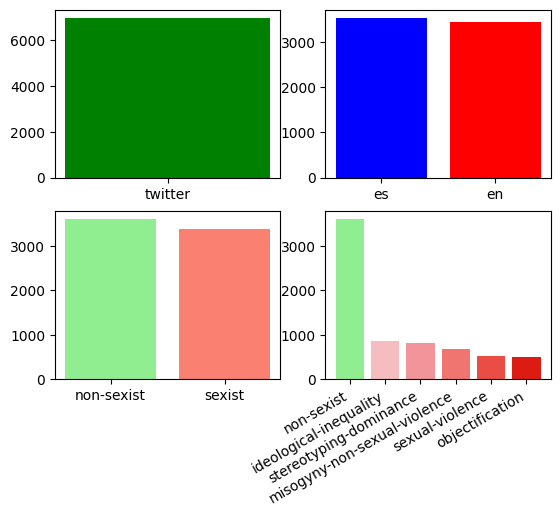

In [3]:
# Create a grid for four charts
fig, axs = plt.subplots(2,2)

# List of columns to plot and their positions
column_chart_positions = {
    'source': (0,0), 
    'language': (0,1), 
    'task1': (1,0), 
    'task2': (1,1)
}

# Class label colors
column_chart_colors = {
    'source': ['green', 'cyan'], 
    'language': ['blue', 'red'], 
    'task1': ['lightgreen', 'salmon'], 
    'task2': ['lightgreen', '#f6bdc0', '#f1959b', '#f07470', '#ea4c46', '#dc1c13']
}

# Compute the frequency per class label and sort the quantities before plotting them
for column in column_chart_positions:
    frequency = dict(Counter(list(train_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])

# Add some space between the X labels of the last chart
plt.xticks(rotation=30, ha='right')       
plt.show()

Si se replica el mismo análisis de frecuencias sobre el dataset de **test** se pueden determinar los siguientes aspectos:

* A diferencia del conjunto de entrenamiento, en este sí que **aparecen textos procedentes de la red social Gab** aunque en una cifra sumamente **minoritaria** con respecto al número de tweets.

* Si bien el volumen de documentos en inglés y español continua siendo equilibrado, en este conjunto es el inglés el que cuenta con una mayor representatividad.

* Adicionalmente también se modifica el *ranking* de las categorías sexistas, siendo la misoginia una de las más voluminosas a diferencia del dataset de entrenamiento.

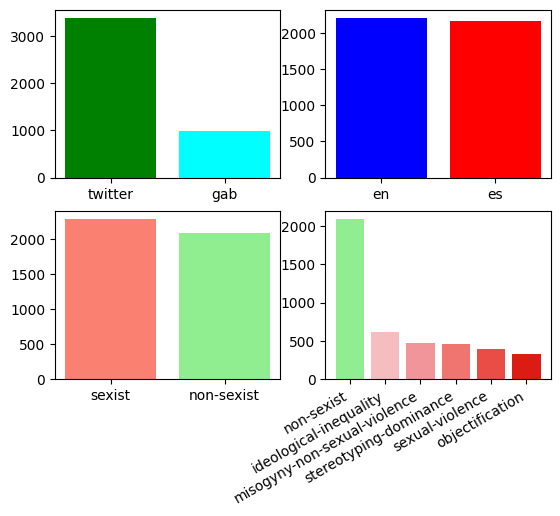

In [4]:
# Create a grid for four charts
fig, axs = plt.subplots(2,2)

# List of columns to plot and their positions
column_chart_positions = {
    'source': (0,0), 
    'language': (0,1), 
    'task1': (1,0), 
    'task2': (1,1)
}

# Class label colors
column_chart_colors = {
    'source': ['green', 'cyan'], 
    'language': ['blue', 'red'], 
    'task1': ['salmon', 'lightgreen'], 
    'task2': ['lightgreen', '#f6bdc0', '#f1959b', '#f07470', '#ea4c46', '#dc1c13']
}

# Compute the frequency per class label and sort the quantities before plotting them
for column in column_chart_positions:
    frequency = dict(Counter(list(test_df[column].values)))
    sorted_frequency = dict(sorted(frequency.items(), key=lambda item: item[1], reverse=True))
    axs[column_chart_positions[column]].bar(
        list(sorted_frequency.keys()),
        list(sorted_frequency.values()),
        color=column_chart_colors[column])
        
# Add some space between the X labels of the last chart
plt.xticks(rotation=30, ha='right')       
plt.show()

## 9. Análisis de textos

En esta última sección el objetivo consiste en realizar diversos análisis estadísticos y visualizaciones basadas en técnicas de **Procesamiento del Lenguaje Natural** (*NLP*). Como paso previo es necesario aplicar algunos métodos de procesamiento basados en textos con los que limpiar y preparar los documentos objetivos.

### 9.1. Procesamiento de textos

Las técnicas elegidas han sido fundamentadas en **análisis exploratorios visuales de los textos** con el fin de comprobar el tipo de caracteres que contienen y el grado de información que aportan para futuros estudios.

1. Eliminar direcciones URL, menciones de usuarios y *hashtags*.
2. Eliminar todos aquellos caracteres no alfabéticos.
3. Eliminar *stopwords*, en inglés y en español, sin perder las estructuras de los textos.
4. Convertir todos los caracteres restantes a minúsculas.

### 9.2. Análisis estadísticos basados en texto

El propósito de esta sección consiste en mostrar gráficos estadísticos acerca de la **características intrísecas de los documentos** considerando tanto los textos originales como los procesados. Este procedimiento será aplicado sobre sendos conjuntos de datos, entrenamiento y test, con el fin de comprobar si existen diferencias significativas entre ambos datasets que deban ser consideradas en futuras fases de entrenamiento de modelos.

#### 9.2.1. Frecuencia de caracteres

El objetivo de este primer análisis consiste en calcular y analizar la **longitud de los textos** de ambos datasets. Comienza el estudio empleando el **conjunto de entrenamiento**. Observando la figura superior izquierda se puede apreciar que en la distribución de los **textos originales** las **mayores frecuencias** se concentran al **comienzo del intervalo**, lo que indica que prácticamente la totalidad de los documentos disponen de entre 0 y 60 caracteres, sin incluir espacios en blanco ni signos de puntuación. Una explicación lógica reside en la **limitación de caracteres** que presenta la única fuente de datos de la que proceden los textos: Twitter. Sin embargo, en la figura inferior izquierda se puede afirmar que el **procesamiento de textos** parece aportar una principal ventaja consistente en la **reducción del número de caracteres** presentando unos tamaños de documentos ligeramente menores y más ampliamente distribuidos a lo largo del intervalo. 

Replicando el mismo procedimiento sobre el **conjunto de test** se aprecia una disminución bastante drástica acerca de las diferencias de **distribuciones de los textos originales y procesados** puesto que prácticamente **son idénticas**. En ambos casos la inmensa mayoría de documentos se caracterizan por tener una **menor longitud** que los textos de entrenamiento.

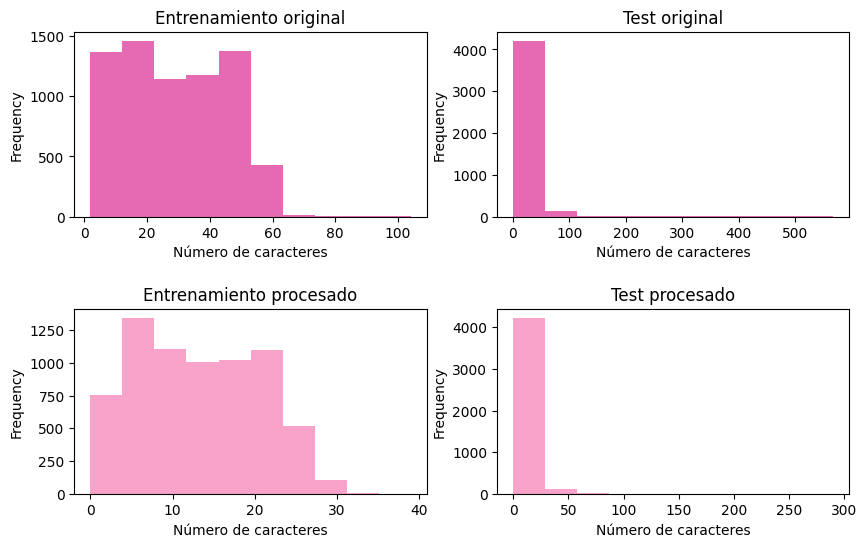

In [11]:
# Exclude common sexism vocabulary 
add_stopwords = [
    'mujer', 'mujeres', 'chica', 'chicas', 
    'woman', 'women', 'girl', 'girls',
    'hombre', 'hombres', 'chico', 'chicos',
    'man', 'men', 'boy', 'boys'
]

# Text processing for train dataset
train_df = process_texts_encode_labels(
    dataset=train_df, 
    text_col='text',
    class_col='task1',
    lemmatize=False,
    correct_words=False)

# Create a new column without stopwords
train_df['clean_texts_without_stopwords'] = delete_stopwords(
    dataset=train_df, 
    text_col='clean_text',
    add_stopwords=add_stopwords)

# Text processing for test dataset
test_df = process_texts_encode_labels(
    dataset=test_df, 
    text_col='text',
    class_col='task1',
    lemmatize=False,
    correct_words=False)

# Create a new column without stopwords
test_df['clean_texts_without_stopwords'] = delete_stopwords(
    dataset=test_df, 
    text_col='clean_text',
    add_stopwords=add_stopwords)

# Tokenize processed train and test texts
train_df['clean_text_tokens'] = train_df.apply(
    lambda row: nltk.word_tokenize(
        row['clean_texts_without_stopwords']),
        axis=1)

test_df['clean_text_tokens'] = test_df.apply(
    lambda row: nltk.word_tokenize(
        row['clean_texts_without_stopwords']), 
        axis=1)

# Delete punctuation marks and tokenize texts
train_df['text_tokens'] = [
    record.split(' ') for record in list(train_df['text'].str.replace('[^\w\s]', ''))
]

test_df['text_tokens'] = [
    record.split(' ') for record in list(test_df['text'].str.replace('[^\w\s]', ''))
]

# Create a grid for 4 charts
fig, ax = plt.subplots(2, 2, figsize=(10,6))

# X and Y labels
ax[0][0].set_xlabel('Número de caracteres')
ax[0][1].set_xlabel('Número de caracteres')
ax[1][0].set_xlabel('Número de caracteres')
ax[1][1].set_xlabel('Número de caracteres')

# Char frequency for ORIGINAL texts in train and test datasets
train_df['text_tokens'].str.len().plot(
    ax=ax[0][0],
    kind='hist', 
    grid=False, 
    color='#e56ab3', 
    title='Entrenamiento original')

test_df['text_tokens'].str.len().plot(
    ax=ax[0][1],
    kind='hist', 
    grid=False, 
    color='#e56ab3', 
    title='Test original')

# Char frequency for PREPROCESSED texts in train and test datasets
train_df['clean_text_tokens'].str.len().plot(
    ax=ax[1][0],
    kind='hist', 
    grid=False, 
    color='#f9a3cb', 
    title='Entrenamiento procesado')
    
test_df['clean_text_tokens'].str.len().plot(
    ax=ax[1][1],
    kind='hist', 
    grid=False, 
    color='#f9a3cb', 
    title='Test procesado')

# Add some vertical space between plots
fig.subplots_adjust(hspace=0.5)

#### 9.2.2. Diversidad léxica

El propósito del segundo estudio consiste en analizar la **riqueza léxica** característica de los conjuntos de entrenamiento y test comparando los documentos originales sin signos de puntuación y tokenizados con los textos tras sufrir un procesamiento más severo. Después de dichos tratamientos a continuación se calculan el **número de términos totales y diferentes** de cada texto para los cuatro casos mencionados anteriormente. 

La principal diferencia al observar la siguiente gráfica reside en la drástica diferencia del número de términos totales y distintos entre entrenamiento y test, por lo que la primera conclusión parece indicar que los **textos de entrenamiento se encuentran más poblados** que los de test.

El segundo aspecto relevante se aprecia al comparar el número de términos totales con la cifra de conceptos diferentes ya que su diferencia es apenas notable, lo que indica un **bajo índice de repetición de palabras** y por ende una **considerable diversidad léxica** en los cuatro casos contemplados. Parece obvio que esta tendencia es **más acusada** en los dos últimos casos en los que se **procesan los textos** ya que tras eliminar caracteres y términos *'no útiles'* existe una mayor probabilidad de que los conceptos resultantes sean únicos dentro de los documentos.

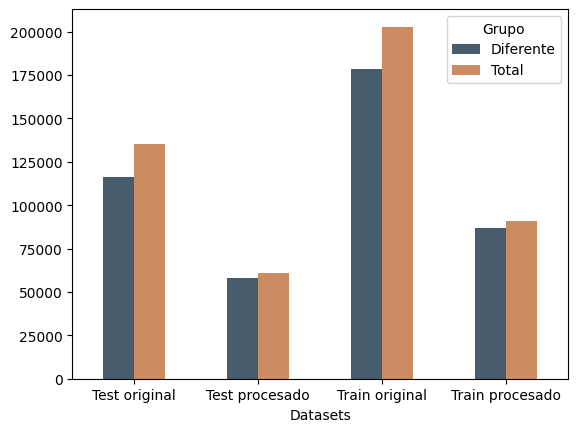

In [12]:
# Compute the total of words and the number of different words per document
# for original and processed train and test texts
grouped_word_count = pd.DataFrame([
    ['Total', 'Train original', count_words(train_df, 'text_tokens')],
    ['Total', 'Train procesado', count_words(train_df, 'clean_text_tokens')],

    ['Diferente', 'Train original', count_words(train_df, 'text_tokens', unique_words=True)],
    ['Diferente', 'Train procesado', count_words(train_df, 'clean_text_tokens', unique_words=True)],

    ['Total', 'Test original', count_words(test_df, 'text_tokens')],
    ['Total', 'Test procesado', count_words(test_df, 'clean_text_tokens')],

    ['Diferente', 'Test original', count_words(test_df, 'text_tokens', unique_words=True)],
    ['Diferente', 'Test procesado', count_words(test_df, 'clean_text_tokens', unique_words=True)]],

    columns=['Grupo', 'Datasets', 'Valores'])

# Plot the calculations in a grouped bar chart
grouped_word_count.pivot('Datasets', 'Grupo', 'Valores').plot(
    kind='bar',
    color=['#475c6c', '#cd8b62'])
plt.xticks(rotation=0)
plt.show()

### 9.3. Nube de palabras

En este subapartado se pretende representar gráficamente los **términos de mayor frecuencia** y una tabla con sus respectivas **frequencias absolutas** empleando el conjunto de **datos procesados**, puesto que contiene únicamente los conceptos más relevantes. Tal y como se aprecia en la siguiente nube de palabras, en el conjunto de **entrenamiento** únicamente se visualizan términos muy dispares que apenas proporcionan información útil. No obstante, en combinación con la tabla de frequencias absolutas se aprecian **vocablos negativos** como *no* y *dont*, lo que puede estar relacionado con las vejaciones, prohibiciones y falta de cualidades muy características del sexismo. Adicionalmente también aparecen **verbos comunes** como *ser* y *like*, muy utilizados también en la mayoría de expresiones machistas.

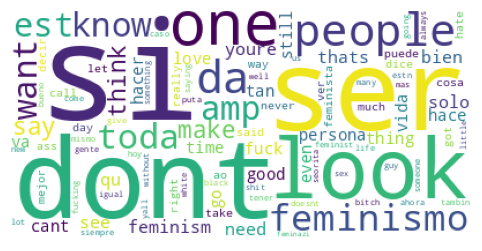

like         732
si           530
dont         503
ser          447
feminismo    272
one          261
look         256
people       247
know         239
get          223
dtype: int64

In [14]:
# Set a wordcloud chart with a white background and 100 words max
word_cloud_object = WordCloud(
    background_color='white',
    max_words=100)

# Create a wordcloud chart with the train dataset
train_wordcloud = word_cloud_object.generate(str(list(train_df['clean_texts_without_stopwords'].values)))

# Plot settings
fig = plt.figure(1, figsize=(10,3))
plt.axis('off')
plt.imshow(train_wordcloud)
plt.show()

# TOP 10 most frequent words ~ Absolute frequency
pd.Series(' '.join(train_df.clean_texts_without_stopwords).split()).value_counts()[:10]

En la siguiente gráfica se aprecia la **misma tendencia** con el conjunto de **test procesado** siendo viable la aplicación de las conclusiones obtenidas anteriormente.

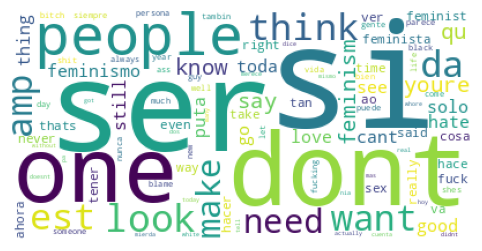

like      460
dont      321
si        292
ser       247
get       184
one       164
people    159
know      148
would     146
look      144
dtype: int64

In [15]:
# Set a wordcloud chart with a white background and 100 words max
word_cloud_object = WordCloud(
    background_color='white',
    max_words=100)

# Create a wordcloud chart with the train dataset
wordcloud = word_cloud_object.generate(str(list(test_df['clean_texts_without_stopwords'].values)))

# Plot settings
fig = plt.figure(1, figsize=(10,3))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

# TOP 10 most frequent words ~ Absolute frequency
pd.Series(' '.join(test_df.clean_texts_without_stopwords).split()).value_counts()[:10]

### 9.4. Análisis de n-gramas

Con la siguiente función se persigue el propósito de dividir los documentos de **entrenamiento** en un conjunto de frases con hasta **N palabras** de modo que se pueda calcular y conocer la **frecuencia de las expresiones** resultantes. Pueden ser tanto bigramas con dos palabras, trigramas con tres conceptos y así hasta el número de términos deseado. Tras realizar diversas pruebas, a mayor valor mejor comprensión de los temas que tratan las expresiones más frecuentes, y por ende se establece este valor a 10.

En el conjunto de **entrenamiento** únicamente se encuentran opiniones de usuarios de **Twitter** y por lo tanto las temáticas son de diversa índole, como comentarios machistas acerca de los **cuerpos de las mujeres y los roles** que pueden desempeñar. Sin embargo, los 10-gramas resultantes en el conjunto de **test** en el que existen más fuentes de datos parece existir una **mayor amplitud de tópicos** siendo los mayoritarios **noticias** acerca de violencia hacia la mujeres.

In [17]:
# Top 20 most frequent 10-grams in the train dataset
list(get_top_ngrams(train_df, 'clean_text', 10) \
    .drop_duplicates(subset=['clean_text'])['ngrams'].values)[0:20]

['sit in front with her will he accept what if',
 'me to cook i need it for husband later in',
 'smears it on her face so she feels like a',
 'women like girls are so much prettier than men like',
 'all that people i want so say something what we',
 'tweet about it every second and if we do ya',
 'loved and he may hit the woman or use her',
 'preparate la puta que te re pari porque los viernes',
 'te pasa paleto si que eres piensa lo que te',
 'grew up in town where doles is from he is',
 'solo me lo dice a mi aunque todas la de',
 'as stupid for falling for it so we have to',
 'que lo cuides por que el es mi lo amo',
 'feministas por el mero hecho de que lo haga una',
 'just watched the long video amp no it does not',
 'el deporte pero eso no quita lo basura que fue',
 'stage in life dont feel the need to prove myself',
 'tu crush o tirndole la caa as con todas dios',
 'was handing me his receipt only to playfully yank it',
 'single and see the same women show him no interest']

In [18]:
# Top 20 most frequent 10-grams in the test dataset
list(get_top_ngrams(test_df, 'clean_text', 10) \
    .drop_duplicates(subset=['clean_text'])['ngrams'].values)[0:20]

['refugees could not enter the see the link and excerpt',
 'debate thank you donald sir bruce and think about making',
 'structure which a superficial theoretically untrained observer blinded an immediate',
 'de que la intervencin norteamericana en el conflicto hubiera sido',
 'faltado las filtraciones reveladoras sobre el particularen el seguimiento de',
 'merchant named david isaacs born in frankfurt germany in immigrated',
 'their genetic desires but what will come at a cost',
 'jews foods they say diabolical whichll be installed in afghanistan',
 'table nobody has consent to effeminated sodomize nor homosexualize not',
 'golpe de cocana en bolivia en junio de orquestado por',
 'marroqu da una paliza a una menor de aos de',
 'en directo sin disimulo su indignacin por el fallo del',
 'and white girl deadlocksim sick of seeing girls who have',
 'es que definitivamente son obras que negativamente hablando no tienen',
 'wear shirts did get a thumbs up from an elderly',
 'chica la turba 

### 9.5. Análisis de emociones

Finalizando el análisis exploratorio se procede a identificar la **emoción de cada texto** para comprobar qué reflejan los distintos documentos de entrenamiento y test en función del criterio de un modelo de Aprendizaje Automático. Para ello se ha empleado el **modelo *transformer* T5 de Google pre-entrenado** disponible en *Hugging Face* en este [enlace](https://huggingface.co/mrm8488/t5-base-finetuned-emotion) sobre los conjuntos de **documentos procesados** con un doble objetivo:

* Calcular **métricas globales** acerca de la cifra de textos pertenecientes a **cada emoción** para valorar si se corresponde con los resultados que cabrían esperarse dada la temática que se aborda.

* Realizar el mismo cálculo aunque para **cada una de las clases sexistas** que aparecen en la columna *task2* para luego intentar analizar las **características de los documentos** que han propociado su clasificación en una u otra categoría.

In [ ]:
# Emotion detection over the train documents
train_emotions = get_emotions_from_texts(
    dataset=train_df, 
    text_col='clean_text')

# Emotion detection over the test documents
test_emotions = get_emotions_from_texts(
    dataset=test_df, 
    text_col='clean_text')

#### 9.5.1. Análisis de emociones. Métricas globales 

Comienza el análisis sobre el conjunto de **entrenamiento** cuyas métricas globales presentan el siguiente ranking:

* La **emoción más popular es joy** tanto en documentos sexistas como no sexistas lo cual es **bastante sorprendente** especialmente en el primer caso en el que se supone que los términos sexistas deberían expresar emociones negativas. No obstante tras una inspección visual de los textos sexistas clasificados en esta emoción he podido extraer las siguientes conclusiones:

    * En la mayoría de los textos existen **términos positivos** que componen expresiones relativas a la  **cosificación sexual del cuerpo de la mujer** sin la presencia de conceptos negativos, y por ende el modelo considera a estos textos dentro de esta categoría.

    * Adicionalmente también he podido detectar textos con una considerable **ironía** que si bien su significado es negativo, se pueden considerar **positivos desde una perspectiva global** puesto que la cantidad de **términos negativos es muy minoritaria**.

* Las **siguientes emociones** situadas a continuación de la primera representan emociones negativas, tal y como era de esperar, relacionadas con **la ira, el miedo y la tristeza**. Tras una inspección visual de los textos clasificados en esta categoría he podido detectar características tales como **términos y expresiones súmamente violentos** tanto de opiniones sexistas como de reivindicaciones o quejas, además de noticias acerca de la **represión femenina, rechazo a mujeres transgénero** por miedo, etc. 

* Otro aspecto destacable, aunque en un volúmen ínfimo es la representación de la emoción **love en los textos sexistas**. Si bien se podría pensar que se trata de una emoción positiva, lo cierto es que tras una inspección visual de dichos documentos esta emoción realmente representa **términos y expresiones de amor y de sexo**, aunque no su **significado es súmamente negativo** puesto que la mayoría alude a agresiones sexuales, cosificación del cuerpo de la mujer, vejaciones, etc.

In [ ]:
train_emotions.groupby(['task1'])['emotion'].value_counts(ascending=False)

task1       emotion 
non-sexist  joy         1468
            anger       1081
            fear         751
            sadness      238
            surprise      31
            love          30
            fat            1
sexist      joy         1220
            anger       1116
            fear         729
            sadness      240
            love          60
            surprise      12
Name: emotion, dtype: int64


En el análisis sobre el conjunto de **test** podemos descubrir unas cifras y emociones similares a las encontradas en los datos de entrenamiento, y tras una inspección visual similar a la realizada anteriormente se puede determinar que las conclusiones extraídas son aplicables también para este dataset. 

In [ ]:
test_emotions.groupby(['task1'])['emotion'].value_counts(ascending=False)

task1       emotion 
non-sexist  joy         863
            anger       622
            fear        427
            sadness     137
            love         19
            surprise     19
sexist      anger       851
            joy         733
            fear        466
            sadness     174
            love         41
            surprise     16
Name: emotion, dtype: int64

#### 9.5.2. Análisis de emociones. Métricas por clases 

En esta última parte del análisis procedemos a identificar las emociones más populares por categorías sexistas presentes en ambos datasets. Comienza el estudio por el conjunto de **entrenamiento** en cuyos siguientes resultados se puede visualizar las **dos emociones más populares para cada clase**, siendo en general dos categorías específicas: **anger** y **joy**. 

Las dos clases sexistas que más pueden sorprender tener una emoción positiva como categoría más poblada son **objectification** y **stereotyping-dominance**. Tras un examen visual de algunos documentos pertenecientes a sendas clases he podido concluir que, la mayoría de textos de la primera tratan sobre vestimenta femenina y cosificación del cuerpo de la mujer, mientras que la segunda representan quejas del colectivo femenino culpando al masculino de su inseguridad, desconfianza, desigualdad laboral y salarial, acoso. En resumen se trata de **documentos irónicos** que contienen **términos y/o expresiones positivas** aunque sus significados no lo son. Este fenómeno refleja uno de los principales problemas característicos de los modelos automáticos al intentar comprender el lenguaje natural: la ironía. 

In [ ]:
pd.DataFrame(train_emotions.groupby(['task2'])['emotion'].value_counts(ascending=False))

emotion
task2                        emotion          
ideological-inequality       anger         325
                             joy           303
                             fear          168
                             sadness        65
                             love            3
                             surprise        2
misogyny-non-sexual-violence anger         249
                             joy           216
                             fear          176
                             sadness        41
                             surprise        2
                             love            1
non-sexist                   joy          1468
                             anger        1081
                             fear          751
                             sadness       238
                             surprise       31
                             love           30
                             fat             1
objectification              joy           214
                             anger         140
                             fear          104
                             sadness        29
                             love           12
                             surprise        1
sexual-violence              anger         215
                             joy           159
                             fear           85
                             sadness        29
                             love           28
                             surprise        1
stereotyping-dominance       joy           328
                             fear          196
                             anger         187
                             sadness        76
                             love           16
                             surprise        6

Con respecto al conjunto de datos de **test** se puede apreciar que los resultados son idénticos a los anteriormente descritos y adicionalmente las temáticas coinciden prácticamente con las explicadas previamente.

In [ ]:
pd.DataFrame(test_emotions.groupby(['task2'])['emotion'].value_counts(ascending=False))

emotion
task2                        emotion          
ideological-inequality       anger         258
                             joy           189
                             fear          126
                             sadness        40
                             love            4
                             surprise        4
misogyny-non-sexual-violence anger         185
                             joy           131
                             fear          116
                             sadness        36
                             love            3
                             surprise        1
non-sexist                   joy           863
                             anger         622
                             fear          427
                             sadness       137
                             love           19
                             surprise       19
objectification              joy           133
                             anger          88
                             fear           65
                             sadness        24
                             love           13
                             surprise        1
sexual-violence              anger         196
                             joy            92
                             fear           75
                             sadness        19
                             love           15
                             surprise        3
stereotyping-dominance       joy           188
                             anger         124
                             fear           84
                             sadness        55
                             surprise        7
                             love            6

## 10. Conclusiones finales

En este último apartado se recopilan los aspectos más relevantes acerca de los conjuntos de datos *EXIST* a modo resumen del notebook completo.

* **Fuentes de datos**: Twitter y Gab.

* **Método de búsqueda** por expresiones y términos sexistas, en **inglés y español**, propuestos por trabajos en áreas similares, expertos en la materia, cuentas de redes sociales, etc.

* Técnicas de **procesamiento y balanceo de idiomas** aplicadas únicamente sobre **Twitter**, ya que apenas existe población de Gab.

* **Etiquetado de datos** mediante varios equipos de expertos de menor a mayor experiencia.

* **Clases balanceadas** tanto en detección como en clasificación de sexismo.

* El conjunto de **entrenamiento** únicamente dispone de **tweets**, mientras que el de test se compone de documentos procedentes de sendas fuentes de datos.

* El **tratamiento de documentos** ayuda a **normalizar y reducir** los tamaños de los textos pertenecientes a sendos datasets.

* Existe una **alta diversidad léxica** puesto que el número de palabras diferentes es muy similar a la cifra total de términos de los documentos, tanto originales como procesados.

* En función de la **nube de palabras** con los términos más comunes no se han podido obtener conclusiones demasiado relevantes más allá de la aparición de varias **expresiones negativas y verbos comunes**, que suelen ser componentes clave de las frases sexistas.

* Según el análisis de N-gramas el **conjunto de test** dispone de una **mayor diversidad de temáticas sexistas** ya que sus documentos proceden de varias fuentes, en comparación con el **conjunto de entrenamiento** que únicamente contiene **comentarios y opiniones de Twitter**.

* Finalmente mediante la **detección de emociones** se han podido descubrir las **temáticas más frecuentes** a nivel global y de categoría sexista, siendo las dos **mayoritarias: joy y anger**. Tras una inspección visual detallada sobre los documentos sexistas se ha podido comprobar que aquellos pertenecientes a la emoción *joy* se caracterizan por ser **irónicos y representar expresiones y actitudes sexuales y machistas** con respecto al cuerpo de la mujer aunque con una presencia mínima o nula de términos negativos.